# Decision tree based models

This week we will use the https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.# diabetes dataset. Our goal is to classify people based on their symptoms if they have diabetes or not.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

#### 1. Prepare dataset
 - load the diabetes_data_upload.csv dataset
 - search for missing values and if needed, handle them!
 - encode the non numeric variables into numeric ones! For the binary features simply encode them as (0/1), do not create two separate columns for them!

In [4]:
#loading in the dataset

data = pd.read_csv('diabetes_data_upload.csv')
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


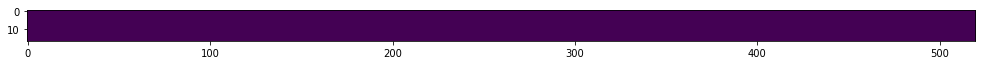

In [5]:
#checking the missing values

plt.figure(figsize=(17, 17))
plt.imshow(data.T.isna())
plt.show()

In [6]:
#creating a np.array from the dataset

diabetes = data.to_numpy()

#checking the nan values in the rows

indices = []

for i in range(0,len(diabetes)):
    if np.nan in list(diabetes[i]):
        indices.append(i)
        
print('The number of rows having nan values is:', len(indices))

The number of rows having nan values is: 0


In [7]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
#checking if all the columns have binary values or some has some other values

column_names_list = list(data.columns)

for i in range(1,len(column_names_list)):
    print(column_names_list[i], ':', collections.Counter(data[column_names_list[i]]))

Gender : Counter({'Male': 328, 'Female': 192})
Polyuria : Counter({'No': 262, 'Yes': 258})
Polydipsia : Counter({'No': 287, 'Yes': 233})
sudden weight loss : Counter({'No': 303, 'Yes': 217})
weakness : Counter({'Yes': 305, 'No': 215})
Polyphagia : Counter({'No': 283, 'Yes': 237})
Genital thrush : Counter({'No': 404, 'Yes': 116})
visual blurring : Counter({'No': 287, 'Yes': 233})
Itching : Counter({'No': 267, 'Yes': 253})
Irritability : Counter({'No': 394, 'Yes': 126})
delayed healing : Counter({'No': 281, 'Yes': 239})
partial paresis : Counter({'No': 296, 'Yes': 224})
muscle stiffness : Counter({'No': 325, 'Yes': 195})
Alopecia : Counter({'No': 341, 'Yes': 179})
Obesity : Counter({'No': 432, 'Yes': 88})
class : Counter({'Positive': 320, 'Negative': 200})


In [9]:
#let's encode the non numerical values

data.Gender.replace({'Male':1, 'Female':0}, inplace=True)

for i in range(2,len(column_names_list)-1):
    data[column_names_list[i]].replace({'Yes':1, 'No':0}, inplace=True)
    
data['class'].replace({'Positive':1, 'Negative':0}, inplace=True)

In [10]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [11]:
#getting these values to an x matrix nd y vector

y = list(data.pop('class'))

x = data.to_numpy()

#### 2. Train & visualize decision tree classifier
 - train a decision tree classifier using the sklearn API
 - use its default parameters
 - for training use all the data, this is only and exploratory task now
 - visualize the decision tree (the `plot_tree` function in sklearn will be helpful)
 - manually check for two cases if the returned Gini impurities are correct
 - in a few sentences discuss the results

In [210]:
#decision tree classifier

dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [211]:
#fitting the data

dt.fit(data, y)

DecisionTreeClassifier()

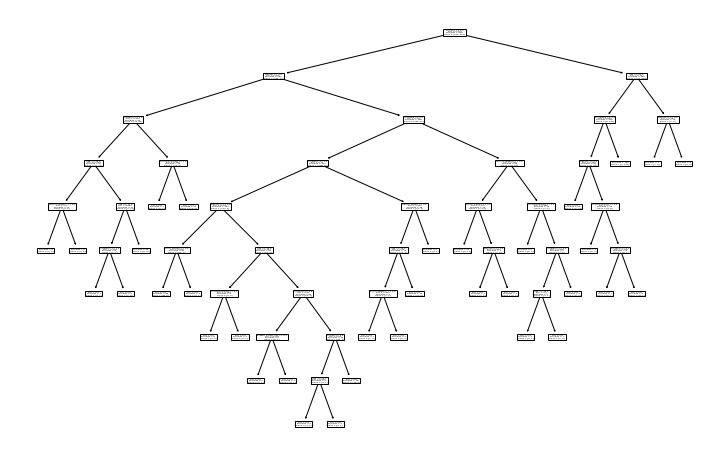

In [212]:
#plotting the results-

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=data.columns)
plt.show()

In [213]:
N = len(data)
group1 = N-sum(y)

gini = 1 - (group1/N)**2 - ((N - group1)/N)**2

print('The gini value for the "polyuria" features:', round(gini,3))

The gini value for the "polyuria" features: 0.473


In [214]:
N = 262
group1 = N-185

gini = 1 - (group1/N)**2 - ((N-group1)/N)**2

print('The gini value for the "gender" features:', round(gini,3))

The gini value for the "gender" features: 0.415


#### 3.  Random forest feature importance
 - train a random forest classifier on all the data using the sklearn API
 - use default values again, but fix the random_state to 42!
 - plot the 10 most important features' importances
    - create a bar plot where the height of the bar is the feature importance
    - show the 10 features where the feature importance is the highest
    - `feature_importance` attribute is helpful

In [232]:
#random forest

rf = RandomForestClassifier(random_state = 42)
rf.fit(data, y)
importances

array([0.09552202, 0.10487592, 0.20370195, 0.20265792, 0.0523786 ,
       0.01895028, 0.03094233, 0.0210071 , 0.03014725, 0.02992408,
       0.03939163, 0.02838694, 0.05507751, 0.02656052, 0.04407285,
       0.01640309])

In [225]:
#the important features

importances = rf.feature_importances_

#sorting them by values

imp_list = []

for i in range(0,len(importances)):
    temp = [importances[i], column_names_list[i]]
    imp_list.append(temp)

imp_list.sort(reverse = True)

#plotting the results

num_list = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

for i in range(0,10):
    print('The', num_list[i], 'most important feature is', imp_list[i][1], 'with a value of', round(imp_list[i][0],3))

The 1st most important feature is Polyuria with a value of 0.204
The 2nd most important feature is Polydipsia with a value of 0.203
The 3rd most important feature is Gender with a value of 0.105
The 4th most important feature is Age with a value of 0.096
The 5th most important feature is partial paresis with a value of 0.055
The 6th most important feature is sudden weight loss with a value of 0.052
The 7th most important feature is Alopecia with a value of 0.044
The 8th most important feature is Irritability with a value of 0.039
The 9th most important feature is Polyphagia with a value of 0.031
The 10th most important feature is visual blurring with a value of 0.03


In [226]:
#we only need the first 10 elements

temp_list = list(np.array(imp_list).T)
highest_values_imp = list(new_list[0][0:10])
highest_values_names = list(new_list[1][0:10])

#reversing the order

ten_imp_values = []

for i in range(0,len(highest_values_imp)):
    ten_imp_values.append(float(list(highest_values_imp)[::-1][i]))
    
ten_imp_names = list(highest_values_names)[::-1]

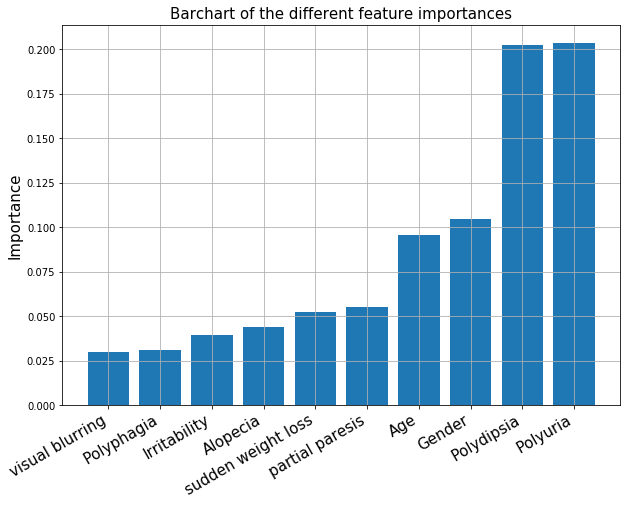

In [227]:
#plotting the barplot

plt.figure(figsize=(10,7))
plt.bar(ten_imp_names, ten_imp_values, align='center')
plt.title('Barchart of the different feature importances', fontsize=15)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.grid()
plt.show()

#### 4. Evaluation
 - generate prediction probabilities with a decision tree and with a random forest model
 - use 5 fold cross validation for both time (so you should get 520 predictions)
 - use default parameters for both models
 - compare the two models with ROC curves
   - why does the decision tree's ROC curve looks different?

In [219]:
#decision tree classifier prediction
preds_dt = cross_val_predict(dt, data, y, cv=5, method='predict_proba')

#ROC score
fpr_dt, tpr_dt, _ = roc_curve(y_score=np.array(preds_dt).T[1], y_true=y)

In [220]:
#random forest model prexition
preds_rf = cross_val_predict(rf, data, y, cv=5, method='predict_proba')

#ROC score
fpr_rf, tpr_rf, _ = roc_curve(y_score=np.array(preds_rf).T[1], y_true=y)

In [221]:
preds_rf

array([[0.36, 0.64],
       [0.55, 0.45],
       [0.32, 0.68],
       ...,
       [0.  , 1.  ],
       [0.73, 0.27],
       [0.98, 0.02]])

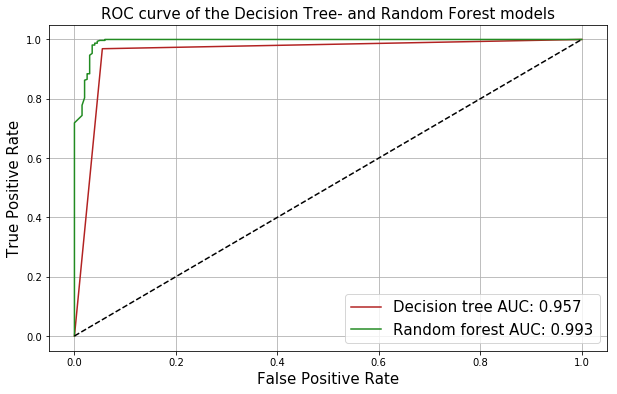

In [222]:
#plotting the ROC curve

plt.figure(figsize=(10, 6))

plt.plot(fpr_dt, tpr_dt, color = 'firebrick', label='Decision tree AUC: ' + str(np.round(roc_auc_score(y_score=np.array(preds_dt).T[1], y_true=y), 3)))
plt.plot(fpr_rf, tpr_rf, color = 'forestgreen', label='Random forest AUC: ' + str(np.round(roc_auc_score(y_score=np.array(preds_rf).T[1], y_true=y), 3)))

plt.plot([0, 1], [0, 1], '--', color = 'black')

plt.legend(fontsize=15)
plt.title('ROC curve of the Decision Tree- and Random Forest models', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()
plt.show()

The decision tree model uses as a default, "max_leaf_nodes = None" tree. This means that there is an unlimited number of leaf nodes. This return only one tree. While the random forest returns the average of many trees.

#### 5. Tuning model
  - using 80/20% train/test split generate predictions for a random forest model
  - plot the AUC vs number of trees in the forest for both the traing and the test data
  - do we experience overfitting if we use too many trees?

In [223]:
#splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [137]:
#first calculating the AUC scores for trees between 1 and 200

auc_train_list = []
auc_test_list = []
num_trees = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

for i in num_trees:

    #creating the model

    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train, y_train)

    #prediction

    preds_rf_train = cross_val_predict(rf, X_train, y_train, cv=5)
    preds_rf_test = cross_val_predict(rf, X_test, y_test, cv=5)

    #auc score

    auc_train = roc_auc_score(y_train, preds_rf_train)
    auc_test = roc_auc_score(y_test, preds_rf_test)
    
    #saving the results in lists
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)

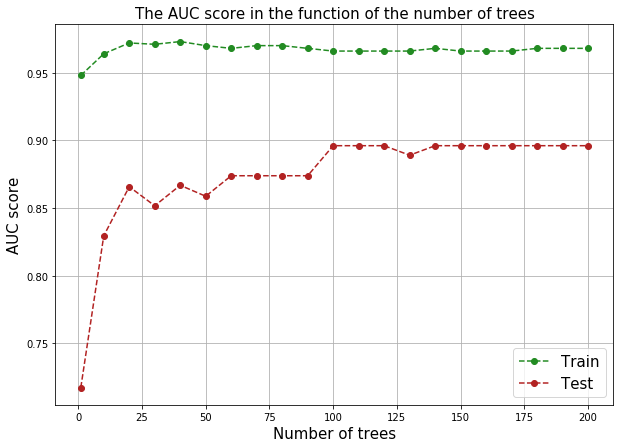

In [138]:
#plotting the AUC score in the function of number of trees

plt.figure(figsize=(10,7))

plt.plot(num_trees, auc_train_list, 'o--', color = 'forestgreen', label = 'Train')
plt.plot(num_trees, auc_test_list, 'o--', color = 'firebrick', label = 'Test')

plt.title('The AUC score in the function of the number of trees', fontsize = 15)
plt.xlabel('Number of trees', fontsize = 15)
plt.ylabel('AUC score', fontsize = 15)

plt.grid()
plt.legend(fontsize = 15)
plt.show()

In [139]:
#now let's calcualte for lots of trees and check the overfitting

auc_train_list = []
auc_test_list = []
num_trees = [1, 100, 200, 500, 1000]

for i in num_trees:

    #creating the model

    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train, y_train)

    #prediction

    preds_rf_train = cross_val_predict(rf, X_train, y_train, cv=5)
    preds_rf_test = cross_val_predict(rf, X_test, y_test, cv=5)

    #auc score

    auc_train = roc_auc_score(y_train, preds_rf_train)
    auc_test = roc_auc_score(y_test, preds_rf_test)
    
    #saving the results in lists
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)

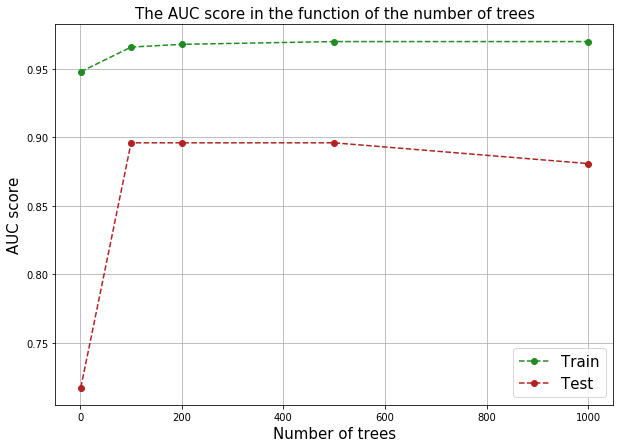

In [140]:
#plotting the AUC score in the function of number of trees

plt.figure(figsize=(10,7))

plt.plot(num_trees, auc_train_list, 'o--', color = 'forestgreen', label = 'Train')
plt.plot(num_trees, auc_test_list, 'o--', color = 'firebrick', label = 'Test')

plt.title('The AUC score in the function of the number of trees', fontsize = 15)
plt.xlabel('Number of trees', fontsize = 15)
plt.ylabel('AUC score', fontsize = 15)

plt.grid()
plt.legend(fontsize = 15)
plt.show()

As it's seen on the testing dataset, after using around 500 trees, overfitting occurs. This proves that using a significant amount of trees is not the best idea. This is due to the fact, that the model "learns" the training dataset and thus the accuracy on any other dataset will be poor.